In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Cargar la imagen
ruta_img = 'img/img5.jpeg'
image = cv2.imread(ruta_img , cv2.IMREAD_GRAYSCALE)

# Aplicar suavizado Gaussiano
blurred = cv2.GaussianBlur(image, (3, 3), 0)

# Detección de bordes usando el gradiente Sobel
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Magnitud del gradiente
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Dirección del gradiente
gradient_direction = np.arctan2(grad_y, grad_x)

# Umbral de Canny
lower_threshold = 30
upper_threshold = 100
edges = cv2.Canny(np.uint8(gradient_magnitude), lower_threshold, upper_threshold)

# Aplicar Laplaciano para detectar bordes adicionales
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# Umbral para convertir la imagen de Laplaciano a imagen binaria
laplacian_edges = np.uint8(np.absolute(laplacian) > 20)

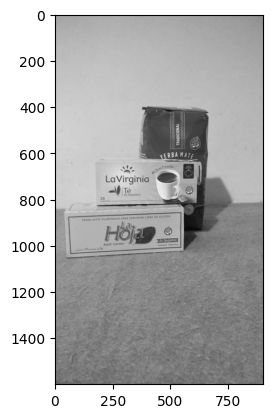

In [42]:
plt.imshow(image, cmap='gray')

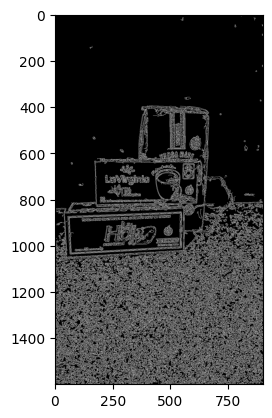

In [43]:
plt.imshow(edges, cmap='gray')

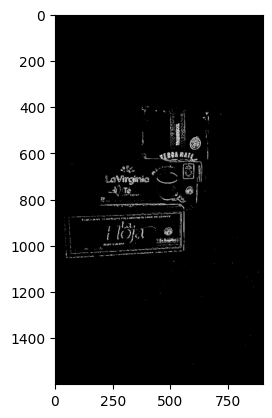

In [44]:
plt.imshow(laplacian_edges, cmap='gray')

# Watershed

In [45]:
# Cargar la imagen
image = cv2.imread(ruta_img)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización para segmentar la imagen
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Eliminar ruido con una operación morfológica de apertura
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Distinguir los diferentes objetos con la transformada de distancia
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Encontrar el área de fondo
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening, sure_fg)

# Etiquetar los objetos conectados
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Convertir la imagen original a formato de 8 bits sin signo (CV_8U)
image_rgb = cv2.convertScaleAbs(image)

# Aplicar la segmentación de Watershed
markers = cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [0,0,255]

# Crear una imagen solo con los bordes
border_image = np.zeros_like(image)
border_image[markers == -1] = [255, 255, 255]

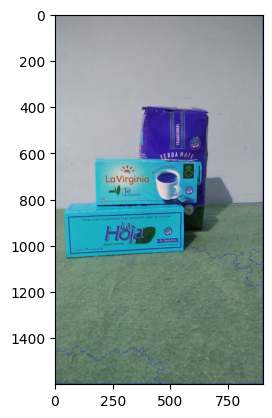

In [46]:
plt.imshow(image_rgb)

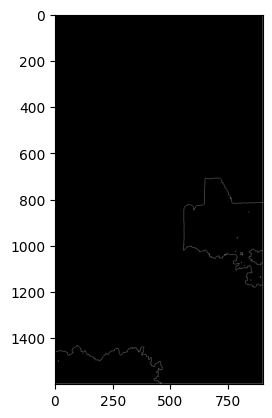

In [47]:
plt.imshow(border_image)